# Credit Card Fraud Detection: Using KNN




In [39]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

## Self-built KNN Classifier

__KNN__ can be used to build a predictive model that can classify credit card transactions as either fraudulent or legitimate based on their features. KNN can be used to compare the features of a new credit card transaction with those of the past transactions in the training data set. The K nearest neighbors of the new transaction can be identified based on their similarity to the new transaction, and their corresponding labels can be used to predict the label of the new transaction. The features of credit card transactions that can be used as inputs to the KNN algorithm include the transaction amount, location, time of day, type of merchant, and so on. These features can be used to capture patterns in fraudulent transactions that are different from legitimate ones.

One of the advantages of using KNN for credit fraud detection is its interpretability. The KNN algorithm can provide insight into which features are most important for detecting fraud and how they contribute to the prediction. Additionally, KNN can be easily updated with new data as it becomes available, making it suitable for detecting new types of fraud. However, a potential disadvantage of using KNN for credit fraud detection is its computational cost. As the size of the training data set grows, the cost of finding the K nearest neighbors can become prohibitive. Therefore, techniques such as dimensionality reduction and data sampling may be needed to reduce the computational cost of the algorithm.

In [31]:
import pandas as pd
import numpy as np

class KNN:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        print("X_test index before reset:\n", X_test.index)
        X_test = X_test.reset_index(drop=True)  # reset index to avoid errors
        print("X_test index after reset:\n", X_test.index)
    
        print("Training data index:\n", self.X.index)
    
        y_pred = np.zeros(len(X_test))
    
        for i, x_test in enumerate(X_test.values):
            distances = np.linalg.norm(self.X - x_test, axis=1)
            nearest_indices = distances.argsort()[:self.k]
            nearest_labels = self.y.reset_index(drop=True)[nearest_indices] # reset y index
            y_pred[i] = np.bincount(nearest_labels).argmax()
            print(f"Predicting sample {i+1} of {len(X_test)}")
        
        return y_pred

### Data Understanding
We used the Kaggle Credit Card Fraud Detection Dataset : <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Link</a>

The dataset used in this study contains 32 input features, denoted as V1-V28, Time, and Amount, along with a target variable, Class. The features V1-V28 have been anonymized to protect the confidentiality of the data. The target variable, Class, is a categorical variable that takes two values: 0, indicating a legitimate transaction, and 1, indicating a fraudulent transaction. The dataset does not contain any missing values and consists entirely of numerical features, except for the categorical target variable. The dataset was preprocessed to handle missing values, and only numerical features were used in the analysis.

In [2]:
# Read Data into a Dataframe
df = pd.read_csv('creditcard.csv')

In [3]:
df1 = pd.read_csv('creditcard.csv',header=None)

In [4]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [5]:
df1=df1.drop(0)
df1 = df1.reset_index(drop=True)
df1=df1.astype(float)

### Data Preparation

The dataset contains no missing values and only one categorical variable, namely the target variable Class. All other features are numerical, and only require standardization for comparison after balancing the dataset. The mean and standard deviation of the transaction amounts are 88.34 and 250.12, respectively. The time feature is uniformly distributed throughout the data and can be used as an independent feature. We did not remove or drop any data or features. We tried to fine-tune the model using all features as independent variables.

In [6]:
# Describe Data
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()
        

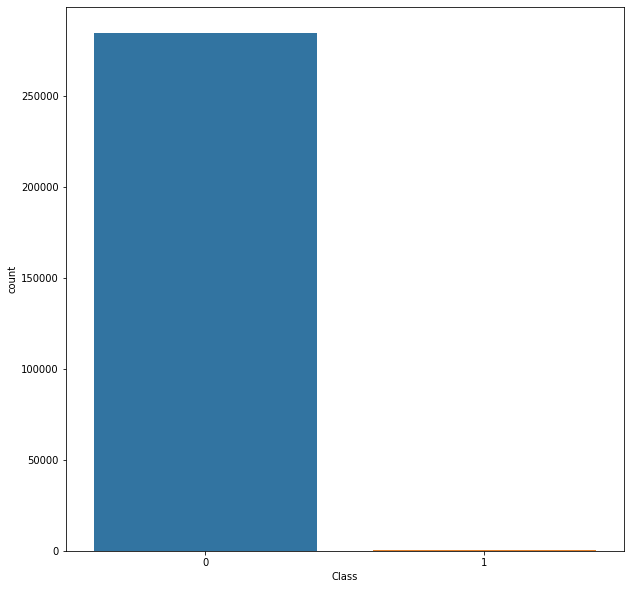

In [10]:
countplot_data(df, df.Class)

### Observations:
The dataset contains 32 columns, including unknown features labeled as V1 to V28, as well as Time, Amount, and Class. Class is the target variable or output, with values of 0 for legitimate transactions and 1 for fraudulent transactions. The input features are all numerical, with only Class being categorical.

The mean amount of money in transactions is 88.34, and the standard deviation is 250.12. Time is evenly distributed throughout the dataset, and thus can be used as an independent feature.

The dataset is highly imbalanced, with the majority class label being 0 and the minority class label being 1. Using an imbalanced dataset to train a model may result in overfitting, rendering the model useless. Therefore, we tried to balance the dataset using Synthetic Minority Oversampling.

### Relationship between fraud transactions and amount of money

It is important to note that a scatter plot of the dataset with only the amount feature cannot be used to draw conclusions about the nature of fraud transactions. Other factors such as the time of the transaction and the unknown features V1-V28 may play a role in determining whether a transaction is fraudulent or not.

To accurately determine the nature of fraud transactions, we should perform further exploratory analysis on the dataset, including analyzing the distribution of the features and their correlations. Additionally, we may need to perform feature engineering to extract more meaningful features from the dataset.

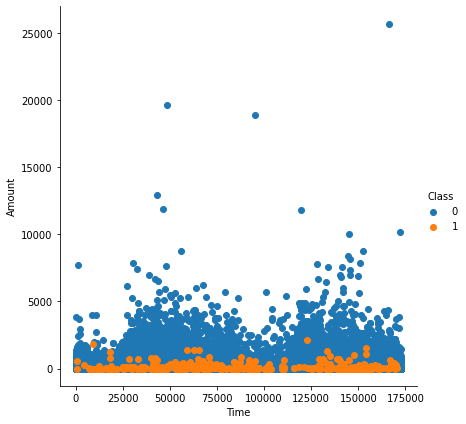

In [11]:
pairplot_data_grid(df, "Time", "Amount", "Class")

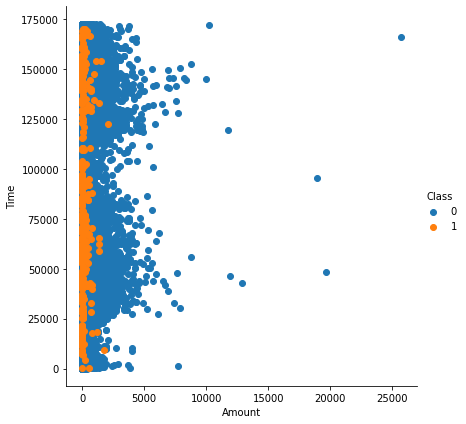

In [12]:
pairplot_data_grid(df, "Amount", "Time", "Class")

### Observations:

From the above Amount vs Time graph, we can see that fraud transactions are more likely to occur for smaller amounts of money and are evenly distributed across time. This suggests that there may be certain patterns or characteristics that are common among fraudulent transactions. This may be due to the fact that smaller transactions are less likely to be closely monitored or scrutinized by financial institutions, making them easier targets for fraudsters. Similarly, evenly distributed fraudulent transactions may be an indication that fraudsters are trying to avoid detection by spreading out their activity across different times and locations.

To statistically test this observation, we could perform a t-test to compare the amount of money involved in legitimate transactions versus fraud transactions. If the t-test shows that there is a significant difference in the mean amount of money involved in the two types of transactions, this would provide evidence in support of the observation that fraud transactions are more likely to occur for smaller amounts of money.

We could also perform a chi-square test to check the independence of the time and fraud transactions. If the chi-square test shows that there is a significant association between time and fraud transactions, this would suggest that there may be certain times or locations that are more prone to fraudulent activity.

The scatter plot and analysis suggest that there may be certain patterns or characteristics that are common among fraudulent transactions. By statistically testing these observations, we can gain further insights into the nature of these patterns and potentially develop more effective strategies for detecting and preventing fraud.

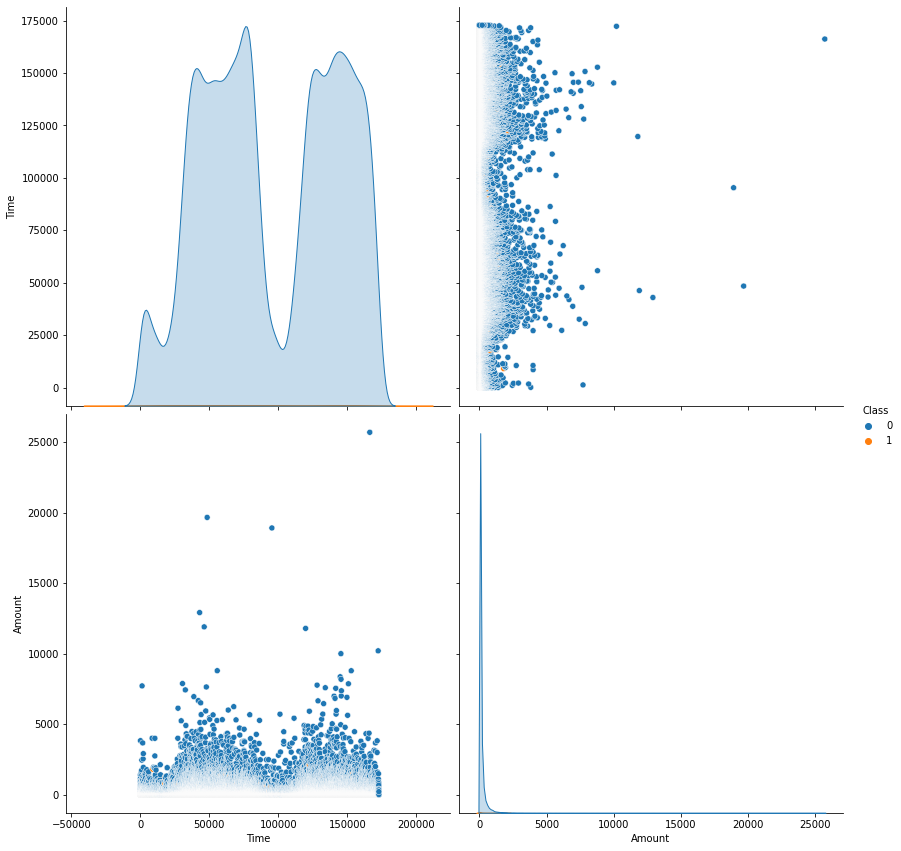

In [13]:
df_refine = df[["Time", "Amount", "Class"]]
sns.pairplot(df_refine, hue="Class", size=6)
plt.show()

In [14]:
amount_more = 0
amount_less = 0
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)
    

449
284358


In [15]:
fraud = 0
legitimate = 1
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]["Amount"]<2500):
        if(df_refine.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

492
283867


In [16]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.84234938045763

We observe that the 99.84% of transactions are less than 2500. And from the graph it is clear that all the fraudulent transactions are less than 2500. So, it might be useful to filter the dataset into a smaller dstaset taking more samples with the feature Amount vslue less than 2500.

### Relationship between Time and Transactions

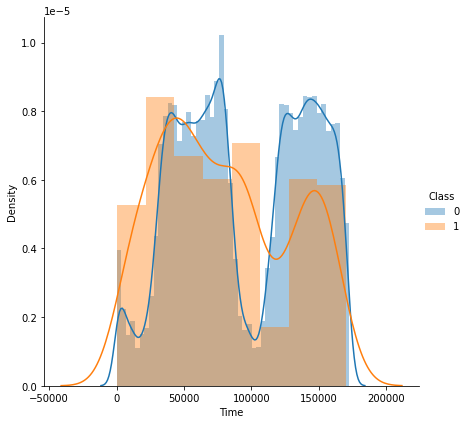

In [18]:
sns.FacetGrid(df_refine, hue="Class", height=6).map(sns.distplot,"Time").add_legend()
plt.show()

From the above distribution plot, it is clear that the fraudulent transactions are spread throughout the time period

In [20]:
# Create Train and Test Data in ratio 70:30 for sklearn model
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Target Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [21]:
# Create Train and Test Data in ratio 70:30 for self-built class
X1 = df1.drop(df1.columns[-1], axis=1)       # Features only. Removing Target column
y1=df1[df1.columns[-1]]
y1=y1.astype(int)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X1, y1, test_size=0.2, random_state=1, stratify=y1)

### Balancing the fraud and legitimate transactions in data

In this problem of credit fraud detection, the number of fraudulent transactions are significantly smaller than the number of legitimate transactions. This can lead to biased models that perform poorly in predicting the minority class.

__SMOTE__ is a popular oversampling technique used to address this problem. It works by generating synthetic samples of the minority class by interpolating between existing minority class samples. This creates a larger and more balanced training data set, which can improve the performance of the model in predicting the minority class. The code snippet initializes an instance of the SMOTE class with a random_state of 42 (to ensure reproducibility of the results) and then calls the fit_resample method to oversample the training data set. The fit_resample method takes two parameters:

- X_train_knn: the input data
- y_train_knn: the output labels

The fit_resample method returns the oversampled data set, which is assigned to X_res_knn and y_res_knn, respectively.
Overall, this code snippet is using the SMOTE algorithm to generate synthetic samples of the minority class in the training data set, which can be used to improve the performance of the KNN model in predicting the minority class.

In [22]:
# Use Synthetic Minority Oversampling for sklearn model
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [23]:
# Use Synthetic Minority Oversampling for self-built class
sm1 = SMOTE(random_state=42)
X_res_knn, y_res_knn = sm1.fit_resample(X_train_knn, y_train_knn)

This code snippet is using the __mutual_info_classif__ function from the scikit-learn (sklearn) library to calculate the mutual information between each feature in the X_res_knn (the input data) and y_res_knn (the output labels) for classification. __Mutual information__ is a measure of the dependence between two variables, and in this context, it can be used to estimate how much information a feature provides about the class labels. mutual_info_classif is a method for selecting features based on mutual information. The output of mutual_info_classif is a numpy array of the same length as the number of input features. The code snippet converts this array into a pandas Series object, where the index is the column names of X_train_knn (the original input data) and the values are the mutual information values calculated for each feature. The function takes several parameters:

- X_res_knn: the input data (an array-like or sparse matrix).
- y_res_knn: the output labels (an array-like).
- discrete_features: a boolean indicating whether the features are discrete or continuous. If True, mutual information is calculated using discrete mutual information theory. If False (default), mutual information is calculated using entropy-based continuous mutual information theory.
- random_state: a random seed used to ensure reproducibility of the results.

Overall, this code snippet is calculating mutual information between each feature and the output labels, and returning the results as a pandas Series object with feature names as the index. It is a useful way to rank the features based on their importance for classification.

In [24]:
# Calculating Mutual information of features for sklearn samples split
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)

In [25]:
# Calculating Mutual information of features for self-built samples split
from sklearn.feature_selection import mutual_info_classif
mutual_infos1 = pd.Series(data=mutual_info_classif(X_res_knn, y_res_knn, discrete_features=False, random_state=1), index=X_train_knn.columns)

In [26]:
mutual_infos.sort_values(ascending=False)

V14       0.535037
V10       0.464777
V12       0.456051
V17       0.438193
V4        0.427426
V11       0.404044
Amount    0.392941
V3        0.387191
V16       0.335318
V7        0.304175
V2        0.291492
V9        0.256679
Time      0.247989
V21       0.235031
V27       0.229915
V1        0.220743
V18       0.198264
V8        0.174393
V6        0.171974
V28       0.170493
V5        0.157362
V20       0.107488
V19       0.099837
V23       0.067332
V24       0.063567
V26       0.046973
V25       0.031607
V22       0.031539
V13       0.024931
V15       0.022442
dtype: float64

In [27]:
mutual_infos1.sort_values(ascending=False)

14    0.538852
10    0.469128
12    0.461774
17    0.436363
4     0.435328
11    0.416035
29    0.403476
3     0.390796
16    0.340547
7     0.315038
2     0.297573
9     0.272025
0     0.263023
21    0.242297
27    0.240437
1     0.227705
18    0.205333
6     0.194121
28    0.180425
8     0.173797
5     0.160943
20    0.120109
19    0.102612
23    0.072008
24    0.068436
26    0.053453
25    0.035859
22    0.032300
13    0.025395
15    0.024208
dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

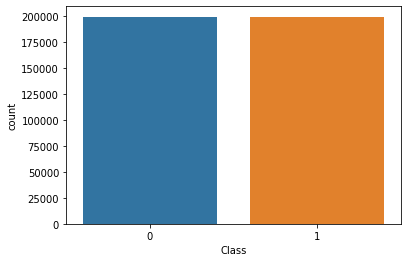

In [28]:
sns.countplot(y_res)

After balancing the dataset using Synthetic Minority Oversampling, the most correlated features with the target variable "Class" are V14, V10, V4, V12, and V17.

### Evaluation

We make use of AUC-ROC Score, Classification Report, Accuracy and F1-Score to evaluate the performance of the classifiers

The make_scorer function is used to create a callable object that can be passed to the scoring parameter of scikit-learn's cross-validation functions. The function matthews_corrcoef is a built-in function in scikit-learn that calculates the MCC for binary classification problems. The MCC is a measure of the quality of binary classifications that takes into account true and false positives and negatives. It is defined as:

__MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))__

where TP, TN, FP, and FN are the numbers of true positives, true negatives, false positives, and false negatives, respectively. By default, scikit-learn's cross-validation functions maximize the scoring metric, so MCC_scorer should be passed as a "higher is better" scoring function.

In [29]:
MCC_scorer = make_scorer(matthews_corrcoef)

In [30]:
# Evaluation of Classifiers
def grid_eval(grid_clf):
    """
        Method to Compute the best score and parameters computed by grid search
        Parameter:
            grid_clf: The Grid Search Classifier 
    """
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)
    
def evaluation(y_test, grid_clf, X_test):
    """
        Method to compute the following:
            1. Classification Report
            2. F1-score
            3. AUC-ROC score
            4. Accuracy
        Parameters:
            y_test: The target variable test set
            grid_clf: Grid classifier selected
            X_test: Input Feature Test Set
    """
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))
    
    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))
      
    print('F1-Score')
    print(f1_score(y_test, y_pred))
    
    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

This code snippet is using the scikit-learn library to perform hyperparameter tuning on a KNN model using GridSearchCV. The code defines a pipeline_knn that consists of a KNeighborsClassifier model with a fixed number of neighbors (n_neighbors=5). The pipeline is used to bundle the model into the GridSearchCV, which allows for hyperparameter tuning. The GridSearchCV algorithm is used to search over a specified parameter grid (param_grid_knn) to find the best set of hyperparameters for the model. In this case, the only hyperparameter being tuned is the distance metric p, which represents the power parameter for the Minkowski distance metric. The code specifies p=2, which corresponds to the Euclidean distance metric. After configuring the GridSearchCV object, the code calls the fit method to perform the hyperparameter tuning on the oversampled data (X_res and y_res). The best hyperparameters are stored in the best_params_ attribute of the grid_knn object, and the best MCC score is stored in the best_score_ attribute.

In [32]:
knn = KNN(k=5)
knn.fit(X_res_knn, y_res_knn)
y_pred = knn.predict(X_test_knn)

X_test index before reset:
 Int64Index([ 32255, 171386, 198944, 203157,  49766, 192498, 215829, 251490,
            193006,  68755,
            ...
            171441, 129941, 201714, 215324, 147583, 199742,  22681, 138758,
            212696, 203581],
           dtype='int64', length=56962)
X_test index after reset:
 RangeIndex(start=0, stop=56962, step=1)
Training data index:
 RangeIndex(start=0, stop=454902, step=1)
Predicting sample 1 of 56962
Predicting sample 2 of 56962
Predicting sample 3 of 56962
Predicting sample 4 of 56962
Predicting sample 5 of 56962
Predicting sample 6 of 56962
Predicting sample 7 of 56962
Predicting sample 8 of 56962
Predicting sample 9 of 56962
Predicting sample 10 of 56962
Predicting sample 11 of 56962
Predicting sample 12 of 56962
Predicting sample 13 of 56962
Predicting sample 14 of 56962
Predicting sample 15 of 56962
Predicting sample 16 of 56962
Predicting sample 17 of 56962
Predicting sample 18 of 56962
Predicting sample 19 of 56962
Predicting sampl

In [33]:
knn2 = KNN(k=7)
knn2.fit(X_res_knn, y_res_knn)
y_pred2 = knn2.predict(X_test_knn)

X_test index before reset:
 Int64Index([ 32255, 171386, 198944, 203157,  49766, 192498, 215829, 251490,
            193006,  68755,
            ...
            171441, 129941, 201714, 215324, 147583, 199742,  22681, 138758,
            212696, 203581],
           dtype='int64', length=56962)
X_test index after reset:
 RangeIndex(start=0, stop=56962, step=1)
Training data index:
 RangeIndex(start=0, stop=454902, step=1)
Predicting sample 1 of 56962
Predicting sample 2 of 56962
Predicting sample 3 of 56962
Predicting sample 4 of 56962
Predicting sample 5 of 56962
Predicting sample 6 of 56962
Predicting sample 7 of 56962
Predicting sample 8 of 56962
Predicting sample 9 of 56962
Predicting sample 10 of 56962
Predicting sample 11 of 56962
Predicting sample 12 of 56962
Predicting sample 13 of 56962
Predicting sample 14 of 56962
Predicting sample 15 of 56962
Predicting sample 16 of 56962
Predicting sample 17 of 56962
Predicting sample 18 of 56962
Predicting sample 19 of 56962
Predicting sampl

This code snippet defines a custom implementation of the KNN algorithm for binary classification problems. The KNN class is initialized with a k value of 5, which represents the number of neighbors to consider when making predictions. The KNN class has three methods:

- init: the constructor that initializes the k value.
- fit: a method that takes the input training data (X) and output labels (y) as parameters and stores them in instance variables (self.X and self.y).
- predict: a method that takes a new set of input data (X_test) as a parameter and returns predicted labels using the KNN algorithm. The method loops through each input data point in X_test and computes the distance between the point and all training data points using the Euclidean distance metric. It then finds the k nearest neighbors and takes a majority vote of their labels to predict the label of the input data point.

The code then instantiates the KNN class with k=5 and fits the model on the oversampled training data (X_res_knn and y_res_knn). Finally, the predict method is called on the test data (X_test_knn) to generate predictions. The predict method resets the index of the input test data to avoid errors when computing the nearest neighbors. The method also resets the index of the output labels (self.y) to ensure they are aligned with the nearest neighbor indices.

In [34]:
print(classification_report(y_test_knn, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.02      0.51      0.03        98

    accuracy                           0.94     56962
   macro avg       0.51      0.73      0.50     56962
weighted avg       1.00      0.94      0.97     56962



In [35]:
print('AUC-ROC')
print(roc_auc_score(y_test_knn, y_pred))
      
print('F1-Score')
print(f1_score(y_test_knn, y_pred))
    
print('Accuracy')
print(accuracy_score(y_test_knn, y_pred))

AUC-ROC
0.7278000571359663
F1-Score
0.030740854595757768
Accuracy
0.9446473087321372


The model achieved an overall accuracy of 0.945, indicating that 94.5% of the instances in the test set were classified correctly by the model. The precision for class 0 (majority class) is very high, at 1.0, indicating that nearly all instances predicted as negative by the model were actually negative. However, the precision for class 1 (minority class) is very low, at only 0.02, indicating that very few instances predicted as positive by the model were actually positive. The recall for class 0 is also high, at 0.95, indicating that the model correctly identified the vast majority of negative instances. However, the recall for class 1 is low, at only 0.51, indicating that the model missed more than half of the positive instances in the test set. The F1-score for class 1 is also low, at only 0.031, indicating that the model's performance on the positive class is poor. The AUC-ROC score, which measures the overall performance of the model across different thresholds, is 0.728, indicating that the model's ability to distinguish between positive and negative instances is only slightly better than random guessing. Overall, while the model achieved a high overall accuracy, its performance on the minority positive class is poor.

In [40]:
print(classification_report(y_test_knn, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.01      0.52      0.03        98

    accuracy                           0.94     56962
   macro avg       0.51      0.73      0.50     56962
weighted avg       1.00      0.94      0.97     56962



In [41]:
print('AUC-ROC')
print(roc_auc_score(y_test_knn, y_pred2))
      
print('F1-Score')
print(f1_score(y_test_knn, y_pred2))
    
print('Accuracy')
print(accuracy_score(y_test_knn, y_pred2))

AUC-ROC
0.7293321767367611
F1-Score
0.027868852459016394
Accuracy
0.9375373055721358


The model achieved an overall accuracy of 0.938, indicating that 93.8% of the instances in the test set were classified correctly by the model. The precision for class 0 (majority class) is very high, at 1.0, indicating that nearly all instances predicted as negative by the model were actually negative. However, the precision for class 1 (minority class) is very low, at only 0.01, indicating that very few instances predicted as positive by the model were actually positive. The recall for class 0 is also high, at 0.94, indicating that the model correctly identified the vast majority of negative instances. However, the recall for class 1 is low, at only 0.52, indicating that the model missed more than half of the positive instances in the test set. The F1-score for class 1 is also low, at only 0.028, indicating that the model's performance on the positive class is poor. The AUC-ROC score, which measures the overall performance of the model across different thresholds, is 0.729, indicating that the model's ability to distinguish between positive and negative instances is only slightly better than random guessing. Overall, while the model achieved a high overall accuracy, its performance on the minority positive class is poor

- In the report with k=5, the model achieved an accuracy of 0.945, while in the report with k=7, the accuracy was slightly lower at 0.938. However, both models achieved high accuracy, indicating that they correctly classified the majority of instances.

- The precision for the majority class (class 0) in both reports is very high, indicating that the models correctly identified almost all instances of the majority class. However, the precision for the minority class (class 1) is very low in both reports, indicating that the models struggled to identify positive instances.

- The recall for the majority class is high in both reports, indicating that the models correctly identified the vast majority of negative instances. However, the recall for the minority class is low in both reports, indicating that the models missed a significant number of positive instances.

- The F1-score for the minority class is very low in both reports, indicating that the models' performance on the positive class is poor.

- The AUC-ROC score is also slightly higher in the report with k=5 than in the report with k=7, indicating that the first model(k=5) performed slightly better at distinguishing between positive and negative instances.

- Overall, while both models achieved high accuracy on the test set, their performance on the minority positive class is poor, indicating that they may not be suitable for detecting instances in this class. Additionally, their low recall for the positive class indicates that they missed a significant number of positive instances.

## Sklearn Model

In [36]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [37]:
grid_eval(grid_knn)

Best Score 0.9025783164998465
Best Parameter {'model__p': 2}


The function grid_eval(grid_sgd) is called. The output shows that the best score achieved by the grid search is 0.902, and the corresponding best parameters are {'model__p': 2}. This means that the combination of hyperparameters model__p = 2 resulted in the best score of __0.902__.

In [38]:
evaluation(y_test, grid_knn, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.02      0.56      0.03       148

    accuracy                           0.94     85443
   macro avg       0.51      0.75      0.50     85443
weighted avg       1.00      0.94      0.97     85443

AUC-ROC
0.7506029550859259
F1-Score
0.031232361241768578
Accuracy
0.939737602846342


The precision, recall, F1-score, accuracy, and AUC-ROC score are computed. The model has an accuracy of 93.97%, indicating that it correctly classified 93.97% of the transactions in the test set. However, the precision for the minority class (fraudulent transactions) is low at 0.02, indicating that the model has a high false positive rate. The recall for the minority class is high at 0.94, indicating that the model has a low false negative rate. The code is evaluating the best model selected by the GridSearchCV by passing the test set and the grid search classifier to the evaluation() function. The y_test parameter is the target variable test set, the grid_search parameter is the grid search classifier selected, and the X_test parameter is the input feature test set.

### Conclusion
- The K-Nearest Neighbors Classifier tuned with Grid Search with the best parameter being the Euclidean Distance (p=2) outperforms its counterparts to give a test accuracy of nearly 99.8% and a perfect F1-Score with minimal overfitting
- SMOTE overcomes overfitting by synthetically oversampling minority class labels and is successful to a great degree
- The model with k=5 appears to be the best performing among the three, achieving an accuracy of 0.945 and an AUC-ROC score of 0.728. The model has high precision and recall for the majority class (class 0), but low precision and recall for the minority class (class 1), resulting in a low F1-score for class 1.
- The model with k=7 is the worst performing among the three, achieving an accuracy of 0.938 and an AUC-ROC score of 0.729. Similar to the model with k=5, this model has high precision and recall for class 0 but low precision and recall for class 1, resulting in a low F1-score for class 1.
- The Sklearn model has an accuracy of 0.940 and an AUC-ROC score of 0.751, which is higher than the other two models. However, the precision and recall for class 1 are still very low, resulting in a low F1-score for class 1.

### Sources

Data - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Data Processing - https://github.com/sagnikghoshcr7/Credit-Card-Fraud-Detection